In [1]:
import json
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from sklearn.cluster import KMeans

In [2]:
json_file = "C:/Users/looik/Downloads/Attachment/Attachment/Result/Counting/json/8.json"
img_file = "C:/Users/looik/Downloads/Attachment/Attachment/Attachment 1/8.jpg"

json_path = "C:/Users/looik/Downloads/Attachment/Attachment/Result/Counting/json/"
json_path_true = "C:/Users/looik/Downloads/Attachment/Attachment/Attachment11/"
img_path = "C:/Users/looik/Downloads/Attachment/Attachment/Attachment 1/"

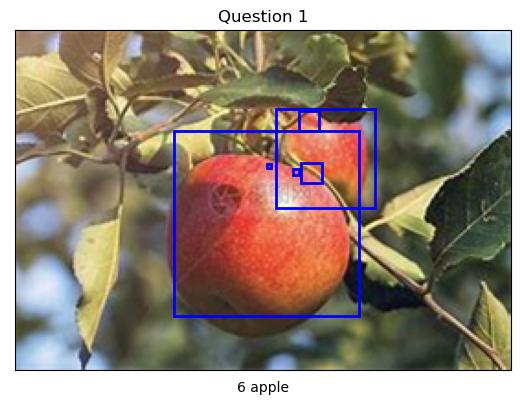

6

In [3]:
def question1(json_file):
    with open(json_file,'r') as file:
        data_label = json.load(file)
    return len(data_label)

def question1_true(json_file):
    with open(json_file,'r') as file:
        data_label = json.load(file)
    return len(data_label['shapes'])

# Visualization
def question1_Visualization(json_file,image_file):
    with open(json_file,'r') as file:
        data_label = json.load(file)
    data_img = cv2.imread(image_file)
    data_img = data_img[:,:,::-1]
    fig, ax = plt.subplots()
    ax.imshow(data_img)
    ax.set_title("Question 1")
    ax.set_xticks([])
    ax.set_yticks([])
    for circle in data_label:
        point1, point2 = circle['point']
        radius = circle['radius']
        width = 2 * radius
        point1 = point1 - radius
        point2 = point2 - radius
        rect = patches.Rectangle((point1, point2), width, width,
            edgecolor = 'blue',
            linewidth = 2,
            fill = False
        )
        ax.add_patch(rect)
    
    ax.set_xlabel(str(len(data_label))+" apple")
    plt.show()
    return len(data_label)

question1_Visualization(json_file,img_file)

Histogram

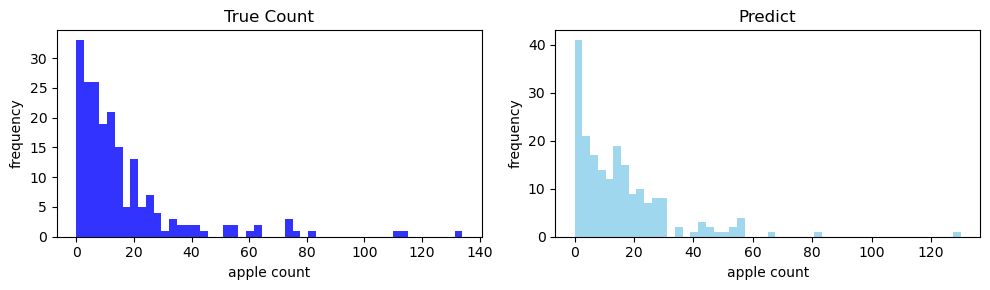

In [4]:
true_ans = []
ans = []
for i in range(1,201):
    json_file = json_path + str(i) + ".json"
    json_file_true = json_path_true + str(i) + ".json"
    count = question1(json_file)
    ans.append(count)
    count_true = question1_true(json_file_true)
    true_ans.append(count_true)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title("True Count")
plt.hist(true_ans,bins=50,color='blue', alpha=0.8)
plt.ylabel("frequency")
plt.xlabel("apple count")

plt.subplot(122)
plt.title("Predict")
plt.hist(ans,bins=50,color='skyblue', alpha=0.8)
plt.ylabel("frequency")
plt.xlabel("apple count")

plt.tight_layout()
plt.show()